In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [14]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = tf.keras.datasets.cifar10.load_data()
x_train_normalize = x_train_image.astype('float32')/255
x_test_normalize = x_test_image.astype('float32')/255
y_train_OneHot = tf.keras.utils.to_categorical(y_train_label)
y_test_OneHot = tf.keras.utils.to_categorical(y_test_label)

In [15]:
def identity_block(x,filters):
    x_input = x
    x = keras.layers.Conv2D(filters = filters, kernel_size = (3,3), strides = (1,1), padding = 'same')(x)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2D(filters = filters, kernel_size = (3,3), strides = (1,1), padding = 'same')(x)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    #x = keras.layers.Add()([x, x_input])   #与输入进行连接
    x = keras.layers.ReLU()(x)
    return x

In [16]:
def convolutional_block(x,filters):
    x_input = x
    x = keras.layers.Conv2D(filters = filters, kernel_size = (3,3), strides = (1,1), padding = 'same')(x)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2D(filters = filters, kernel_size = (3,3), strides = (1,1), padding = 'same')(x)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    x_input = keras.layers.Conv2D(filters, kernel_size=(1,1), strides = (1,1))(x_input)
    x_input = keras.layers.BatchNormalization(axis = 3)(x_input)
    #x = keras.layers.Add()([x, x_input])
    x = keras.layers.ReLU()(x)
    return x

In [17]:
input = keras.layers.Input(shape=(32,32,3))
x = keras.layers.Conv2D(64, (7, 7), strides = (2,2),padding='same')(input)
x = keras.layers.BatchNormalization(axis = 3)(x)
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPooling2D((3, 3), strides = (2,2))(x)
x = convolutional_block(x,16)
x = identity_block(x,16)
#x = identity_block(x,64)
x = convolutional_block(x,32)
x = identity_block(x,32)
#x = identity_block(x,128)
#x = identity_block(x,128)
x = convolutional_block(x,64)
x = identity_block(x,64)
#x = identity_block(x,256)
#x = identity_block(x,256)
#x = identity_block(x,256)
#x = identity_block(x,256)
#x = convolutional_block(x,128)
#x = identity_block(x,512)
#x = identity_block(x,128)
x = keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(10,activation='softmax')(x)

In [18]:
model = keras.models.Model(input,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_train = model.fit(x=x_train_normalize,y=y_train_OneHot,validation_split=0.2,epochs=20,batch_size=300,verbose=1)
def train_history(model_train,train,val):
    plt.plot(model_train.history[train])
    plt.plot(model_train.history[val])
    plt.title('Train History')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')

Epoch 1/20
134/134 [==============================] - 3s 19ms/step - loss: 1.9562 - accuracy: 0.2970 - val_loss: 3.2411 - val_accuracy: 0.0982
Epoch 2/20
134/134 [==============================] - 2s 17ms/step - loss: 1.5156 - accuracy: 0.4425 - val_loss: 2.7781 - val_accuracy: 0.1849
Epoch 3/20
134/134 [==============================] - 2s 17ms/step - loss: 1.3308 - accuracy: 0.5181 - val_loss: 2.0218 - val_accuracy: 0.3284
Epoch 4/20
134/134 [==============================] - 2s 17ms/step - loss: 1.2187 - accuracy: 0.5605 - val_loss: 1.5015 - val_accuracy: 0.4435
Epoch 5/20
134/134 [==============================] - 2s 17ms/step - loss: 1.1424 - accuracy: 0.5903 - val_loss: 1.7498 - val_accuracy: 0.4433
Epoch 6/20
134/134 [==============================] - 2s 17ms/step - loss: 1.0761 - accuracy: 0.6146 - val_loss: 1.7202 - val_accuracy: 0.4643
Epoch 7/20
134/134 [==============================] - 2s 17ms/step - loss: 1.0319 - accuracy: 0.6309 - val_loss: 1.7546 - val_accuracy: 0.4357

In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        9472      
_________________________________________________________________
batch_normalization_21 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
re_lu_17 (ReLU)              (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 16)          9232      
_________________________________________________________________
batch_normalization_22 (Batc (None, 7, 7, 16)          64  

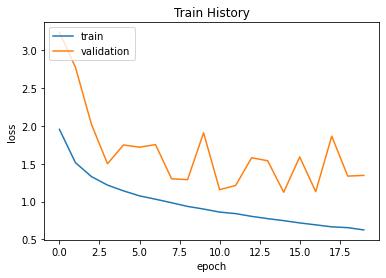

In [20]:
train_history(model_train,'loss','val_loss')

In [21]:
scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=2)

313/313 - 1s - loss: 1.3791 - accuracy: 0.5863


In [22]:
model.save('./MyRes.h5', save_format="h5")

In [23]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils.generic_utils import CustomObjectScope
#model = tf.keras.models.load_model('MyAlex.h5')
#print(model.summary())

 
#keras_model = tf.keras_models.load_model("./MyAlex.h5")
keras_model =tf.keras.models.load_model ("./MyRes.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

open("./MyRes.tflite","wb").write(tflite_model)
 

806232

In [24]:
model = tf.keras.models.load_model('MyRes.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 开启动态量化
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("myres_converted_model_quantized.tflite", "wb").write(tflite_model)

216016